# Visualizing Convolutional Layers

In the previous notebooks we built a MLP to predict numbers from the classical MNIST dataset. Although it worked well for that particular set of data, it's not often the case that vanilla fully-connected, feedforward network perform well in problems that require a deep understanding of spatial data. 

In this notebook we'll focus our attention on convolutional layers, one of the building blocks of convolutional neural layers (CNNs, for short), the root of the modern computer vision. 

## Import the image

Let's import the image we'll use to visualize the feature maps of a CNN layer.

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


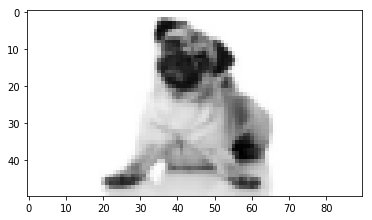

In [1]:
%matplotlib inline

import cv2
import scipy.misc
import matplotlib.pyplot as plt

image_path = 'images/pug.jpeg'

# Load color image and convert to grayscale
colored_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)

# Make it smaller
small_image = scipy.misc.imresize(gray_image, 0.3)

# Rescale entries using our division by 255 trick.
small_image = small_image.astype('float32') / 255

# Show the image
plt.imshow(small_image, cmap='gray')
plt.show()

## Specify Filters

Let's use some filters to isolate or highlight particular features in the image. Although we'll do it manually, by setting up the values of each filter, this is basically what a CNN is doing underneath: Tuning the values of each filter to minimize the overall loss and, thus, produce the best prodictions possible.

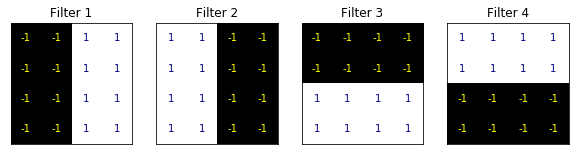

In [2]:
import numpy as np

filter_values = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

# Define four filters by tweaking and tinkering with the values defined above:

filter_1 = filter_values
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3

filters = [filter_1, filter_2, filter_3, filter_4]

# Visualize the filters.

figure = plt.figure(figsize=(10, 5))

for filter_index in range(len(filters)):
    ax = figure.add_subplot(1, len(filters), filter_index + 1, xticks=[], yticks=[])
    ax.imshow(filters[filter_index], cmap='gray')
    ax.set_title(f'Filter {filter_index + 1}')
    width, height = filters[filter_index].shape
    
    for x in range(width):
        for y in range(height):
            filter_value = filters[filter_index][x][y]
            ax.annotate(f'{filter_value}', 
                        xy=(y, x), 
                        horizontalalignment='center', 
                        verticalalignment='center',
                        color='yellow' if filter_value < 0 else 'navy')
    

There. These are the four filters we'll apply to our Pug image.

## Visualize the Activations Map for Each Filter

Let's now see how the feature maps look like as a result of applying these filters.

Using TensorFlow backend.


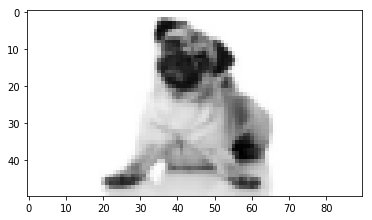

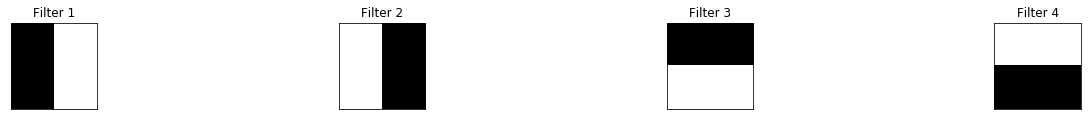

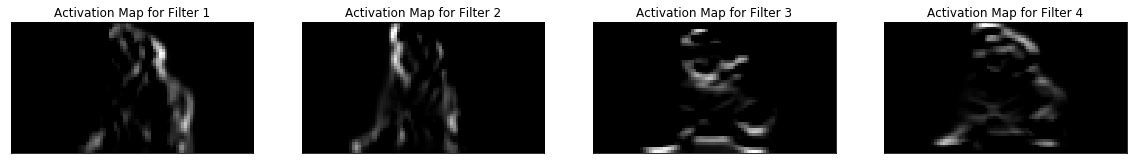

In [3]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D

# Show image
plt.imshow(small_image, cmap='gray')

input_shape = (small_image.shape[0], small_image.shape[1], 1)

# Define a small NN with a single convolutional layer comprised of only one filter
model = Sequential()
model.add(Convolution2D(1, 4, activation='relu', input_shape=input_shape))

# Apply convolutional filter and plot the outcome
def apply_filter(image, index, filter_list, ax):
    custom_weights = [np.reshape(filter_list[index], (4, 4, 1, 1)), np.array([0])]
    model.layers[0].set_weights(custom_weights)
    
    input = np.reshape(image, (1, image.shape[0], image.shape[1], 1))
    prediction = model.predict(input)
    ax.imshow(np.squeeze(prediction), cmap='gray')
    

# Visualize all filters

figure = plt.figure(figsize=(12, 6))
figure.subplots_adjust(left=0, 
                       right=1.5, 
                       bottom=0.8,
                       top=1, 
                       hspace=0.05, 
                       wspace=0.05)

for index in range(len(filters)):
    ax = figure.add_subplot(1, len(filters), index + 1, xticks=[], yticks=[])
    ax.imshow(filters[index], cmap='gray')
    ax.set_title(f'Filter {index + 1}')
    
# Apply filters and visualize activation maps
figure = plt.figure(figsize=(20, 20))
for index in range(len(filters)):
    ax = figure.add_subplot(1, len(filters), index + 1, xticks=[], yticks=[])
    apply_filter(small_image, index, filters, ax)
    ax.set_title(f'Activation Map for Filter {index + 1}')

We see that each filter is detecting particular aspects of the image. The first one seems to be focusing on the right side lines of the dog, while the second on the left. On the other hand, the third filter seems to be capturing the contour of the dog, while the fourth appears to being activated by the inner lines that compound the details of the Pug's body.